In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random

%matplotlib inline
plt.style.use('fivethirtyeight')

# when to use PCA

1) want to reduce the feature/ number of variable, but arent able to identify variables to completely remove from coniderations
2)want to reduce the correalations , or indpendent of each other
3)Are you confortable making your independent variables less interpretables?
[Note: 3rd point is very important as in practical aspects to explain client as it gives linear equation of variable]

In [13]:
# Loading the train data


url1 = 'https://query.data.world/s/cuqtpuoewpxysusrt5z4igihjah4xo'
col_names = ['target','F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']


In [12]:
#loading the test data
url2 = 'https://query.data.world/s/ksxft7lhmbxpihskwsngwhpuul6lye'
col_names = ['target','F1R', 'F1S', 'F2R', 'F2S', 'F3R', 'F3S', 'F4R', 'F4S', 'F5R','F5S','F6R','F6S','F7R','F7S','F8R','F8S','F9R','F9S','F10R',
    'F10S',  'F11R','F11S','F12R','F12S','F13R','F13S','F14R','F14S','F15R','F15S','F16R','F16S','F17R','F17S','F18R','F18S','F19R','F19S',   'F20R',
    'F20S','F21R','F21S','F22R','F22S']

In [14]:
spectf_train= pd.read_csv(url1,sep=',',names=col_names)

In [15]:
spectf_test= pd.read_csv(url2,sep=',',names=col_names)

In [16]:
spectf_train.shape

(187, 45)

In [17]:
spectf_test.shape

(80, 45)

In [19]:
spectf_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 45 columns):
target    187 non-null int64
F1R       187 non-null int64
F1S       187 non-null int64
F2R       187 non-null int64
F2S       187 non-null int64
F3R       187 non-null int64
F3S       187 non-null int64
F4R       187 non-null int64
F4S       187 non-null int64
F5R       187 non-null int64
F5S       187 non-null int64
F6R       187 non-null int64
F6S       187 non-null int64
F7R       187 non-null int64
F7S       187 non-null int64
F8R       187 non-null int64
F8S       187 non-null int64
F9R       187 non-null int64
F9S       187 non-null int64
F10R      187 non-null int64
F10S      187 non-null int64
F11R      187 non-null int64
F11S      187 non-null int64
F12R      187 non-null int64
F12S      187 non-null int64
F13R      187 non-null int64
F13S      187 non-null int64
F14R      187 non-null int64
F14S      187 non-null int64
F15R      187 non-null int64
F15S      187 non-null in

In [18]:
spectf_train.describe()

,target,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,...,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,...,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,0.919786,65.128342,63.786096,68.304813,68.320856,63.818182,62.374332,69.352941,68.534759,62.839572,...,63.358289,61.695187,65.090909,63.850267,64.390374,62.187166,60.770053,58.406417,51.128342,48.593583
std,0.272353,8.961963,10.157746,6.849231,9.046697,9.569165,10.069062,9.513631,10.614082,9.604879,...,8.673589,12.025874,7.980977,9.171545,13.241857,13.691778,15.516746,16.194568,13.350712,15.087756
min,0.000000,23.000000,21.000000,38.000000,34.000000,21.000000,25.000000,21.000000,20.000000,12.000000,...,18.000000,14.000000,33.000000,18.000000,11.000000,6.000000,5.000000,8.000000,13.000000,4.000000
25%,1.000000,61.000000,58.500000,64.000000,65.000000,60.000000,59.000000,67.000000,66.000000,60.500000,...,61.500000,60.000000,60.500000,59.000000,61.000000,58.000000,55.500000,53.500000,44.000000,42.000000
50%,1.000000,66.000000,65.000000,69.000000,70.000000,65.000000,64.000000,71.000000,71.000000,65.000000,...,66.000000,65.000000,66.000000,66.000000,68.000000,66.000000,66.000000,63.000000,55.000000,52.000000
75%,1.000000,71.000000,70.000000,73.000000,74.000000,70.000000,69.000000,75.000000,75.000000,68.000000,...,69.000000,69.000000,70.000000,70.000000,73.000000,71.000000,72.000000,69.000000,60.000000,60.000000
max,1.000000,83.000000,80.000000,82.000000,84.000000,82.000000,79.000000,85.000000,81.000000,76.000000,...,76.000000,77.000000,80.000000,79.000000,81.000000,81.000000,82.000000,82.000000,82.000000,71.000000


In [22]:
spectf_train['target'].value_counts()

1    172
0     15
Name: target, dtype: int64

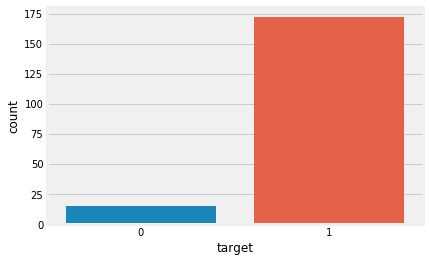

In [23]:
sns.countplot(x='target', data = spectf_train)

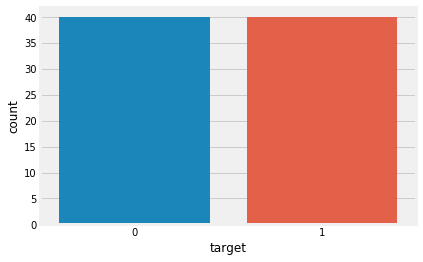

In [24]:
sns.countplot(x='target', data = spectf_test)

Text(0.5, 1.0, 'Correlation between different features')

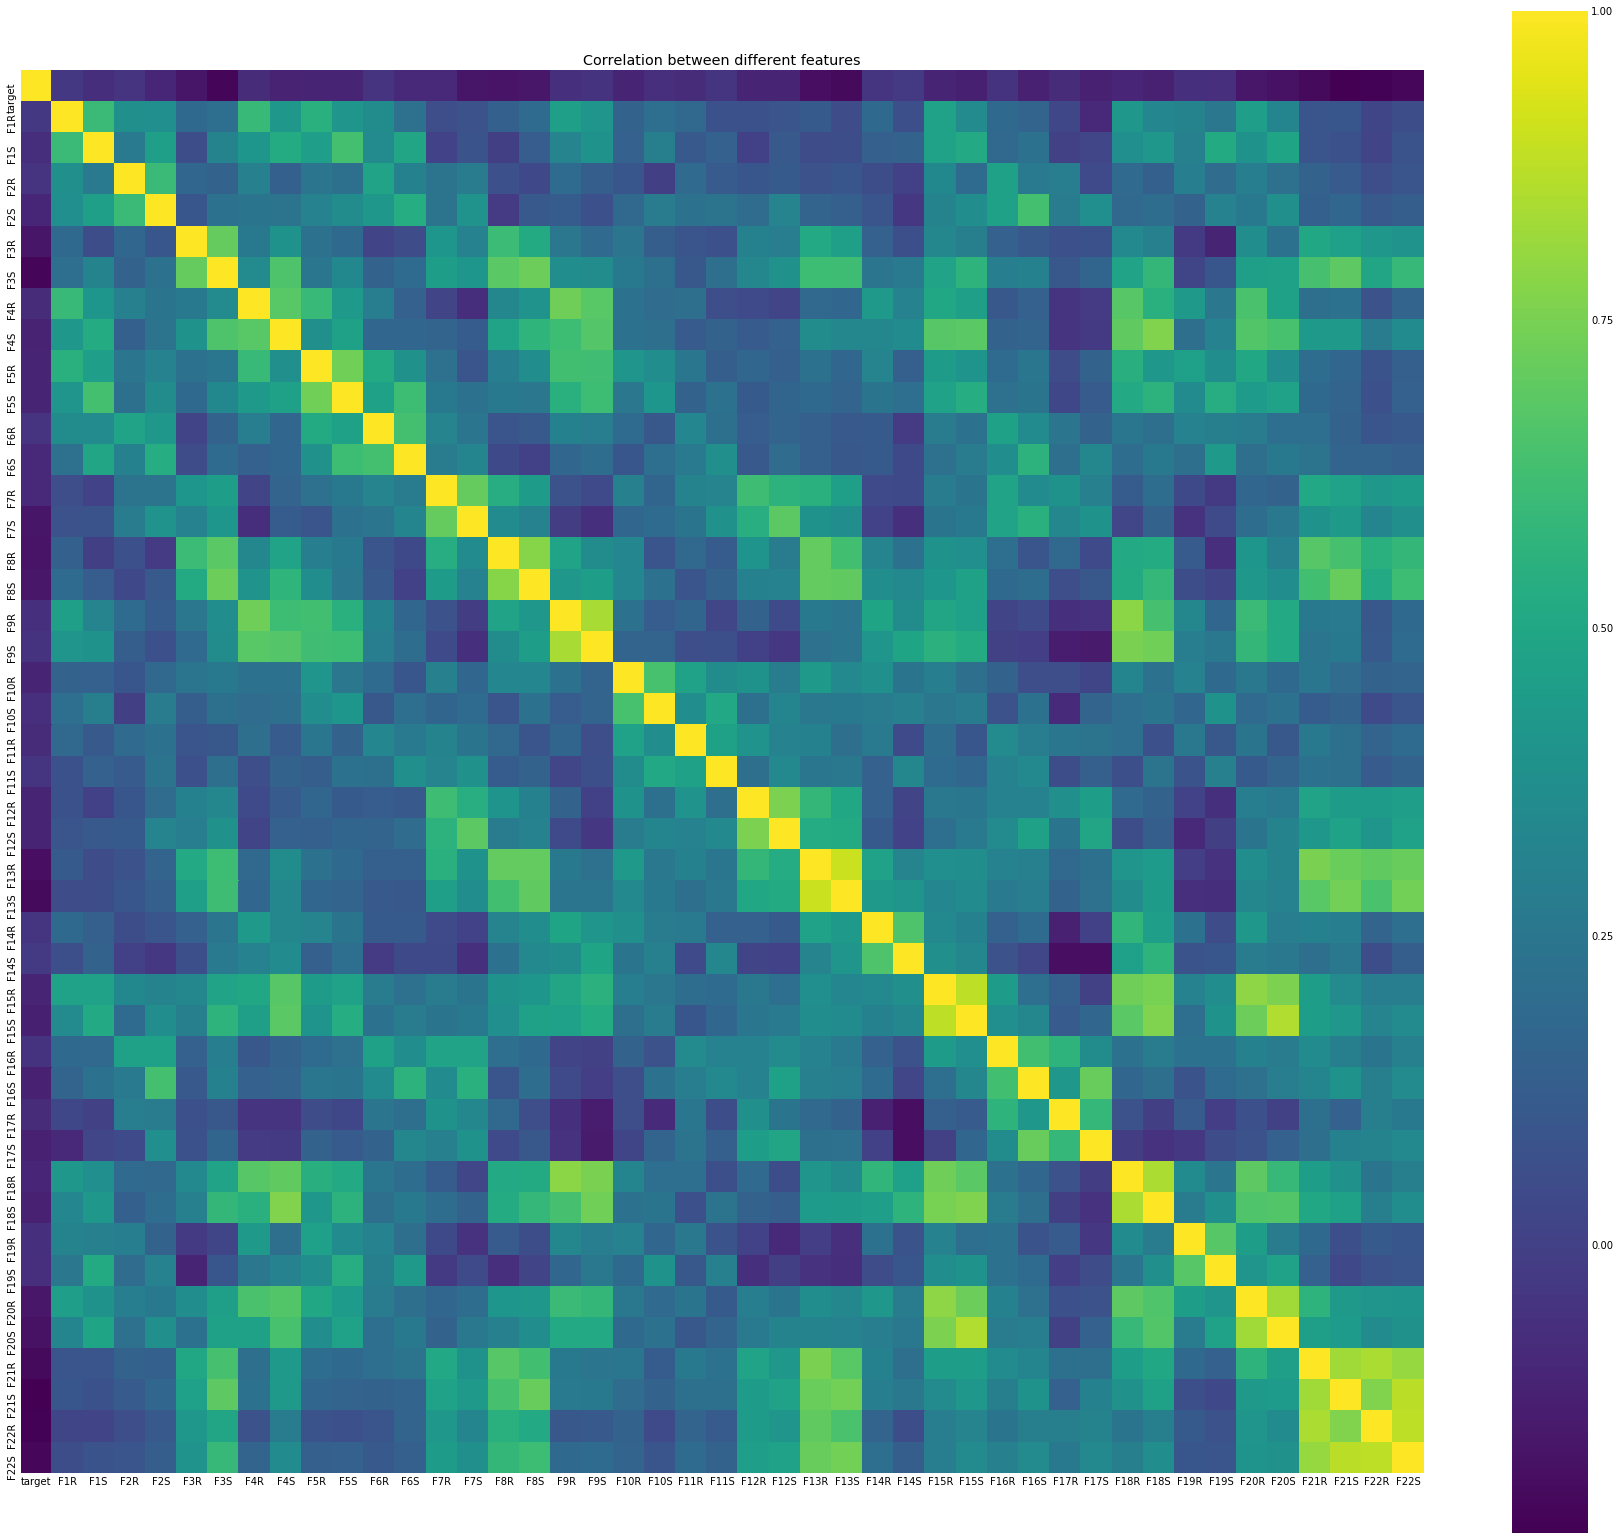

In [26]:
correlation = spectf_train.corr()
plt.figure(figsize=(28,28))
sns.heatmap(correlation, square=True,cmap='viridis')
plt.title('Correlation between different features')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000227A2531B38>,
      dtype=object)

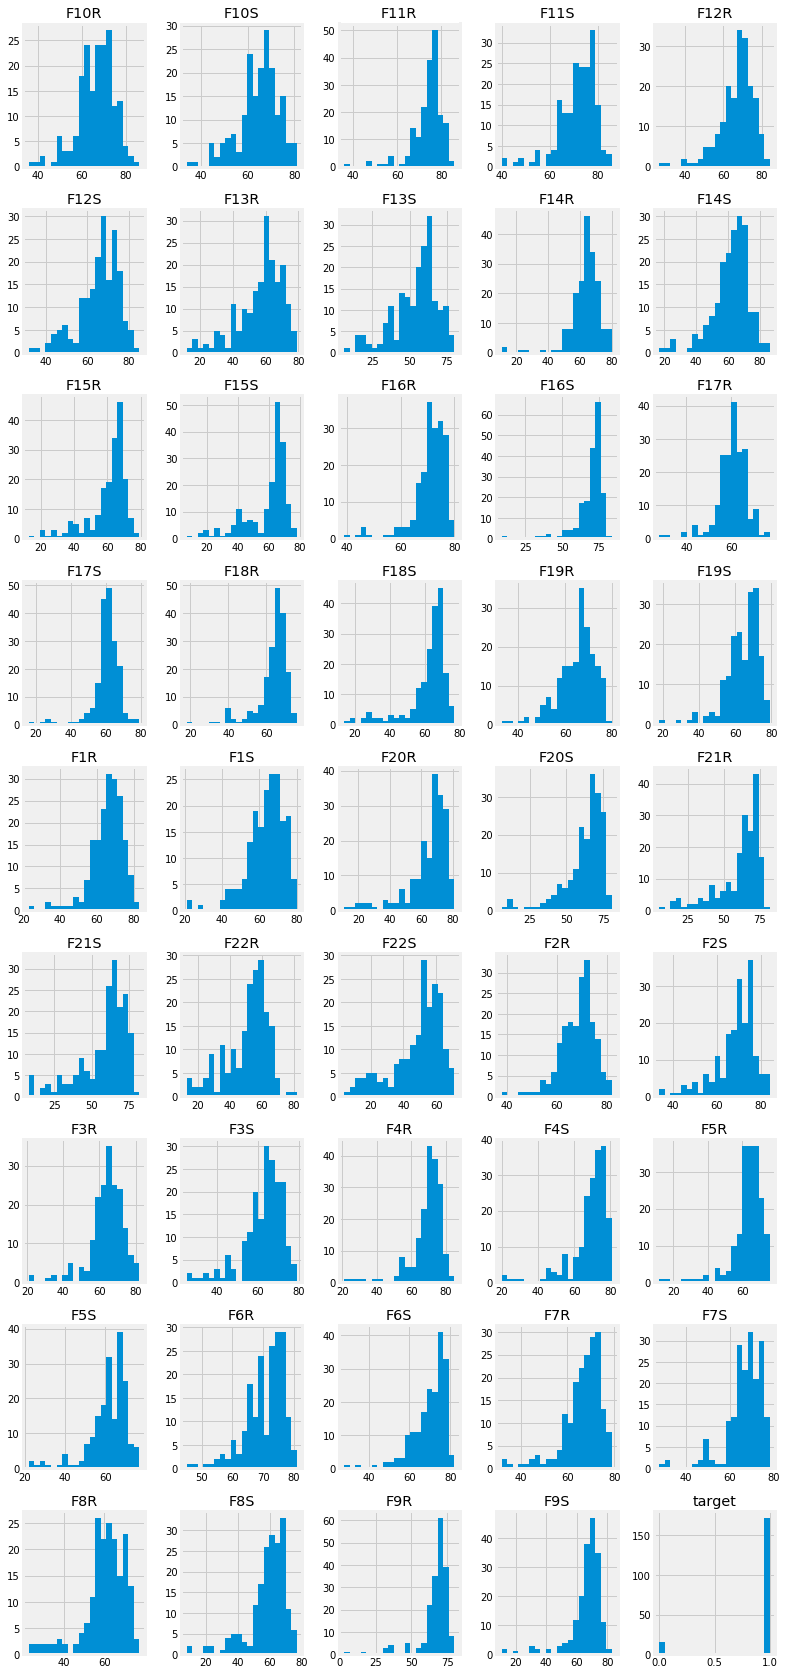

In [27]:
spectf_train.hist(bins=20, figsize=(12,30), layout=(9,5))

In [29]:
target_train = spectf_train['target']
target_test=spectf_test['target']

In [30]:
spectf_train.drop('target',axis=1,inplace=True)
spectf_test.drop('target',axis=1,inplace=True)

# Normalizing the data before PCA
Most of the distribution of columns follow normal distribution. Hence we can scale them using Standard Scaler to preprocess the data.
Standard Scaler standardize features by removing the mean and scaling to unit variance.


In [31]:
# Scaling the Train and Test data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
spectf_train = scaler.fit_transform(spectf_train)
spect_test = scaler.fit_transform(spectf_test)

C:\Users\subsax\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\subsax\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\subsax\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\subsax\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# ###Logistic Regression   <a id='lr'>

Firstly apply logistic regression as a simple model

In [35]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
logreg = LogisticRegression(class_weight='balanced')  

# Start time
start = time.time()
# fit model
logreg.fit(spectf_train, target_train)
# End time
end = time.time()

training_time = end-start
print("Time taken to train Logistic Regression: ", training_time)

Time taken to train Logistic Regression:  0.014369964599609375


C:\Users\subsax\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [36]:
y_pred_class = logreg.predict(spect_test)

In [37]:
from sklearn import metrics

print(metrics.accuracy_score(target_test, y_pred_class))

0.5875


In [38]:
print (metrics.classification_report(target_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.71      0.30      0.42        40
           1       0.56      0.88      0.68        40

   micro avg       0.59      0.59      0.59        80
   macro avg       0.63      0.59      0.55        80
weighted avg       0.63      0.59      0.55        80



In [39]:
print(metrics.confusion_matrix(target_test,y_pred_class))

[[12 28]
 [ 5 35]]


# Applying PCA to logistic regression model 

In [41]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(spectf_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Generally, we take 1/3 component to check the total PCA, 

In [45]:
pca.explained_variance_ratio_[:17].sum()

0.9073714602648498

Text(18, 0.9, '18')

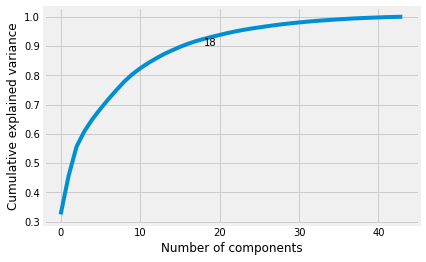

In [47]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('18',xy=(18, .90))

In [48]:
# consider first 18 components as they are explaining the 90% of variation in the data

x_pca = PCA(n_components=18)
spect_df_pca = x_pca.fit_transform(spectf_train)
spect_test_pca = x_pca.fit_transform(spect_test)

Text(0.5, 1.0, 'Correlation between different features')

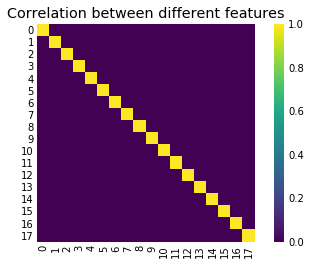

In [49]:
# correlation between the variables after transforming the data with PCA is 0

correlation = pd.DataFrame(spect_df_pca).corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')

Applying Logistic regression after PCA

In [52]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression

# instantiate model
pca_logreg = LogisticRegression(class_weight='balanced')

start = time.time()
# fit model
pca_logreg.fit(spect_df_pca, target_train)
end = time.time()
training_time = end-start
print("Time required to train a Logistic Regression after PCA: ", training_time)

Time required to train a Logistic Regression after PCA:  0.0021724700927734375


C:\Users\subsax\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


* Important**

Here we observed that after PCA, the training time has reduced slightly. 
The original dataset had 45 features to train the model. 
After PCA, we are only using 15 features which takes less time to train.

In [53]:
# make class predictions for the testing set
y_pred_class_pca = pca_logreg.predict(spect_test_pca)

In [55]:
print(metrics.accuracy_score(target_test, y_pred_class_pca))

0.6125


In [57]:
print (metrics.classification_report(target_test, y_pred_class_pca))

              precision    recall  f1-score   support

           0       0.76      0.33      0.46        40
           1       0.57      0.90      0.70        40

   micro avg       0.61      0.61      0.61        80
   macro avg       0.67      0.61      0.58        80
weighted avg       0.67      0.61      0.58        80



In [59]:
print(metrics.confusion_matrix(target_test,y_pred_class_pca))

[[13 27]
 [ 4 36]]
